In [19]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt

In [28]:
df_banknote = pd.read_csv('data_coursera.csv')

In [8]:
df_banknote.describe()

,V1,V2
count,1372.000000,1372.000000
mean,0.433735,1.922353
std,2.842763,5.869047
min,-7.042100,-13.773100
25%,-1.773000,-1.708200
50%,0.496180,2.319650
75%,2.821475,6.814625
max,6.824800,12.951600


In [ ]:
df_banknote_statistical = pd.DataFrame({
    'Mean' : df_banknote[['V1', 'V2']].mean(),
    'STD' : df_banknote[['V1', 'V2']].std(),
    'Min' : df_banknote[['V1', 'V2']].min(),
    '25%' : df_banknote[['V1', 'V2']].quantile(0.25),
    'Median' : df_banknote[['V1', 'V2']].median(),
    '75%' : df_banknote[['V1', 'V2']].quantile(0.75),
    'Max' : df_banknote[['V1', 'V2']].max()
})

df_banknote_statistical

,Mean,STD,Min,25%,Median,75%,Max
V1,0.433735,2.842763,-7.0421,-1.7730,0.49618,2.821475,6.8248
V2,1.922353,5.869047,-13.7731,-1.7082,2.31965,6.814625,12.9516


In [ ]:
scaler = StandardScaler()

scaled_data = scaler.fit_transform(df_banknote[['V1', 'V2']])

df_banknote_scaled = pd.DataFrame(scaled_data, columns=['V1', 'V2'])

df_banknote_scaled.sample(10)

,V1,V2
1356,-1.587885,0.170711
741,1.109348,-0.855315
504,0.843137,0.754426
568,1.375841,0.239845
253,1.707787,0.227487
1314,-1.386388,-2.469624
562,-1.018443,1.842171
386,-1.030724,1.572353
398,1.393507,-0.266644
558,1.390304,-1.159342


C:\Users\syafo\AppData\Local\Temp\ipykernel_12892\1015653295.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(df_banknote_scaled['V1'], df_banknote_scaled['V2'], alpha=0.25, cmap='viridis')


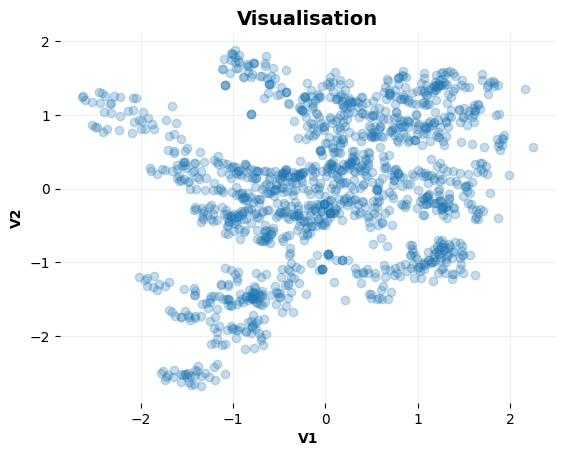

In [47]:
plt.scatter(df_banknote_scaled['V1'], df_banknote_scaled['V2'], alpha=0.25, cmap='viridis')
plt.xlabel('V1')
plt.ylabel('V2')
plt.title('Visualisation', fontsize=14, fontweight='semibold')
plt.box(None)
plt.grid(alpha=0.2)
plt.xlabel('V1', fontweight='semibold')
plt.ylabel('V2', fontweight='semibold')
plt.show()


Statistical Analysis
 The dataset is clean, with no nulls and shows us some statistical information over the 2 columns:
V1 - Mean: 0.433 | STD: 2.842 | Median: 0.496
V2 - Mean: 1.922 | STD: 5.869 | Median: 2.319  
Evaluation
There some steps to evalute if our dataset is suitable to KMeans clustering tasks:
- Variables must be numericals - OK,  V1 and V2 are numericals 
- Padronize data - K-means is sensible to the variables scales, so we need to padronize with StandartScaler